# Work 1


Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [2]:
path = 'C:/Users/91958/Desktop/nyadata/startup_funding.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
test1 = df.copy()

In [5]:
test1

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [6]:
#filtering na
test1.dropna(inplace = True, subset = ['CityLocation'])
test1.reset_index(drop = True, inplace = True)
test1

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2188,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,"3,500,000",Series A
2189,2197,29/04/2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,NaN,NaN
2190,2198,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,"400,000",NaN
2191,2199,29/04/2015,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,"500,000",NaN


In [7]:
cd = test1.copy()
cd

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2188,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,"3,500,000",Series A
2189,2197,29/04/2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,NaN,NaN
2190,2198,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,"400,000",NaN
2191,2199,29/04/2015,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,"500,000",NaN


##  FINDING OUT THE DATA THAT WE WANT TO REPLACE

In [8]:
def testing_city(stringCity):
    if stringCity == 'Delhi':
        return 1
    else:
        return 0
cd['new'] = test1.CityLocation.apply(testing_city)
cd.new.sum()

4

In [9]:
cd['CityLocation'].str.find('SFO / ').sum()

-2192

### USING value_counts() funtion

In [10]:
### TESTING AND HAVING FUN

In [11]:
cd2 = test1.copy()

In [12]:
temppp = cd2['CityLocation'].value_counts()
citiesss = temppp.index
citiesss

Index(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Pune', 'Noida',
       'Hyderabad', 'Chennai', 'Ahmedabad', 'Jaipur', 'Kolkata', 'Chandigarh',
       'Indore', 'Vadodara', 'Goa', 'Singapore', 'Kanpur', 'Delhi',
       'Pune / US', 'Coimbatore', 'Bangalore/ Bangkok', 'Kochi', 'Gwalior',
       'Bhopal', 'Agra', 'Udupi', 'Bangalore / SFO', 'Siliguri',
       'New Delhi / US', 'Trivandrum', 'Mumbai / UK', 'Karur', 'bangalore',
       'US/India', 'London', 'USA/India', 'Jodhpur', 'Missourie',
       'Dallas / Hyderabad', 'Pune / Dubai', 'Chennai/ Singapore', 'Surat',
       'Bangalore / San Mateo', 'Udaipur', 'Panaji', 'SFO / Bangalore',
       'New York/ India', 'Pune / Singapore', 'New Delhi / California',
       'Bangalore / Palo Alto', 'Boston', 'Lucknow', 'Nagpur', 'Pune/Seattle',
       'Hyderabad/USA', 'Kozhikode', 'Bangalore / USA', 'Varanasi', 'USA',
       'Mumbai / NY', 'US', 'India / US', 'Noida / Singapore',
       'Seattle / Bangalore', 'Kerala', 'Hubli', 'Belgaum', 'G

In [13]:
temppp.values


array([627, 446, 381, 240,  84,  78,  76,  66,  35,  25,  19,  10,   9,
         9,   7,   5,   4,   4,   4,   3,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1], dtype=int64)

# MAIN PROG

In [14]:
### WE DERIVED THIS FUNCTION FROM LOOKING AT value_counts() and index function

In [15]:
#function to split indian cities from string

def ind_city(city):
    return city.split('/')[0].strip()

In [16]:
#replacing the wrong written city

test1['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
test1['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
test1['CityLocation'].replace("SFO / Bangalor", "Bangalore", inplace = True)
test1['CityLocation'].replace("Seattle / Bangalore", "Bangalore", inplace = True)

In [17]:
#filtering city

test1['CityLocation'] = test1['CityLocation'].apply(ind_city)

## Vertical bar | is used here as bitwise OR instead of logical or because logical or doesn't work in series in pandas 

In [18]:
#filtering the cities on the basis of given conditions
test1 = test1[(test1['CityLocation'] == "Bangalore") | (test1['CityLocation'] == "Mumbai") | (test1['CityLocation'] == "Gurgaon") | (test1['CityLocation'] == "Noida") | (test1['CityLocation'] == "New Delhi")]


In [19]:
#extracting the cities and their counts
temp = test1['CityLocation'].value_counts()
city = temp.index
No_Of_Funding = temp.values

In [20]:
#printing the city where most number of funding is Done
print("City where most number of funding is done among Bangalore, Mumbai and NCR is:",city[0],".")

City where most number of funding is done among Bangalore, Mumbai and NCR is: Bangalore .


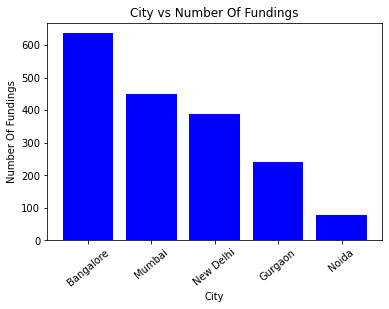

,Name Of City,Number Of Fundings
0,Bangalore,636
1,Mumbai,449
2,New Delhi,389
3,Gurgaon,241
4,Noida,79


In [21]:
#bar Graph
plt.bar(city, No_Of_Funding, color = ['Blue'], width = 0.8)
plt.xlabel("City")
plt.xticks(rotation = 40)
plt.ylabel("Number Of Fundings")
plt.title("City vs Number Of Fundings")
plt.show()
li = list(zip(city, No_Of_Funding))

#build pandas dataframe for the city and corresponding investments
freq = pd.DataFrame(li, columns = ["Name Of City", "Number Of Fundings"])
freq

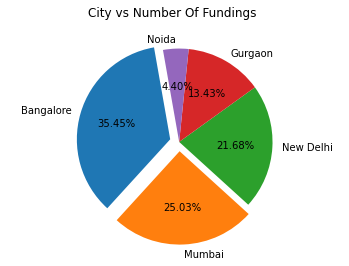

In [36]:

explode= [0.1, 0.1, 0,0,0]
plt.title("City vs Number Of Fundings \n")
plt.pie(No_Of_Funding, explode = explode, labels=city, autopct="%.2f%%",  startangle=100, counterclock = True)
plt.axis("equal")
plt.show()